<a href="https://colab.research.google.com/github/kelvinleonardos/pengantar-data-sains-2023/blob/main/Pertemuan_7_Contoh_Kasus_Microcredential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv("gpa_iq.csv")
data.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


In [3]:
X = data.iloc[:,2:]
X = X.astype('int')
y = data.iloc[:,1]
y = y.astype('int')

In [4]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

     Specs      Score
2  concept  98.199116
0       iq  74.489122
1   gender   0.913340


In [6]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [8]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.5219842  0.02388568 0.45413012]


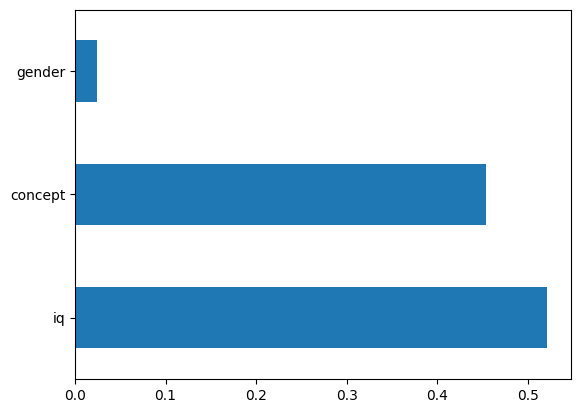

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
import seaborn as sns

In [11]:
corrmat = data.corr()
top_corr_features = corrmat.index

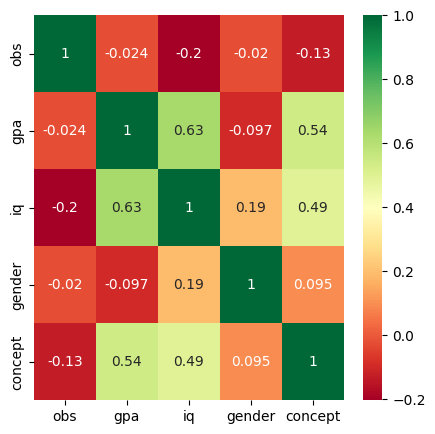

In [12]:
plt.figure(figsize=(5,5))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Kesimpulan
Dapat dilihat pada heatmap dan juga plot pada bagian sebelumnya, IQ cukup berpengaruh walau tidak terlalu signifikan pada GPA atau IP pada penelitian yang dilakukan.